## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [44]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dataset = pd.read_csv("./motorbike_ambulance_calls.csv")

summary_stats = dataset.describe()
headers = dataset.columns.tolist()
dataset_size = dataset.shape

print(dataset.head(10), "\n\n")

for column in headers:
    max_in_column = dataset[column].max()
    min_in_column = dataset[column].min()
    print(f"Max in column {column} is {max_in_column} and min is {min_in_column}")

print(f"\nDataset size is {dataset_size}")
print(f"\n\nDataset stats: \n{summary_stats}")

   index    date  season  yr  mnth  hr  holiday  weekday  workingday  \
0      1  1/1/11  spring   0     1   0        0        6           0   
1      2  1/1/11  spring   0     1   1        0        6           0   
2      3  1/1/11  spring   0     1   2        0        6           0   
3      4  1/1/11  spring   0     1   3        0        6           0   
4      5  1/1/11  spring   0     1   4        0        6           0   
5      6  1/1/11  spring   0     1   5        0        6           0   
6      7  1/1/11  spring   0     1   6        0        6           0   
7      8  1/1/11  spring   0     1   7        0        6           0   
8      9  1/1/11  spring   0     1   8        0        6           0   
9     10  1/1/11  spring   0     1   9        0        6           0   

   weathersit  temp   atemp   hum  windspeed  cnt  
0           1  0.24  0.2879  0.81     0.0000   16  
1           1  0.22  0.2727  0.80     0.0000   40  
2           1  0.22  0.2727  0.80     0.0000   32  

**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [45]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 2.0+ MB
None


**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [46]:
missing_values = dataset.isna().sum()

print(missing_values)

index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


**Висновки з 1-3 завдання (детальні)**

Я так багато написав в 1. тому що пропустив опис датасету.



1.  Працюємо з даними де date задана строкою. Колонка yr має лише 2 значення: 0 та 1, відповідно до першого та другого року збору даних. Місяць рахується від 1, а не від 0. Година в 24-годинному форматі. Holiday колонка має значення 0 та 1, відповідно позначаючи false і true. Weekday - дні тижня індексацією. workingday - 0 та 1, false та true відповідно, позначаючи чи робочий день. weathersit - значення від 0 до 4 вказують наскільки погані погодні умови, 0 будучи найкращими, а 4 - найгіршими. temp - між 0.02 та 1, вказує на темпаратуру, зведену до проміжку даного проміжку. atemp - від 0 до 1 вказує на те, як відчувається темпаратура. hum - від 0 до 1 вказує на вологість повітря. windspeed - між 0.0 та 0.8507 вказує на швидкість вітру.
2. Не враховуючи змінну index у нас 14 колонок, з яких 12 - числові. 
3. В даному датасеті немає пропущених значень в жодній з колонок.



**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [47]:
def tranform_date(df: pd.DataFrame, date_col_name: str):
  df[date_col_name] = pd.to_datetime(df[date_col_name], format='%m/%d/%y')
  return df
  
dataset = tranform_date(dataset, 'date')

In [48]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
  first_day = df[date_col_name].min()
  last_day = df[date_col_name].max()
  print(f"First day of dataset - {first_day}.\nLast day of dataset - {last_day}")

get_time_limits(dataset, 'date')

First day of dataset - 2011-01-01 00:00:00.
Last day of dataset - 2012-12-31 00:00:00


Тепер відомо що працюємо з даними від 1 січня 2011 року, до 31 грудня 2012 року.

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [49]:
columns_to_add = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
data_categorical = dataset[columns_to_add].copy()

**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [50]:
season_to_numeric = {"spring": 0, "summer": 1, "autumn": 2, "winter": 3}

def encode_season(df: pd.DataFrame, season_col_name: str):
  df[season_col_name] = dataset[season_col_name].map(season_to_numeric)
  return df
  
data = encode_season(dataset, 'season')

**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

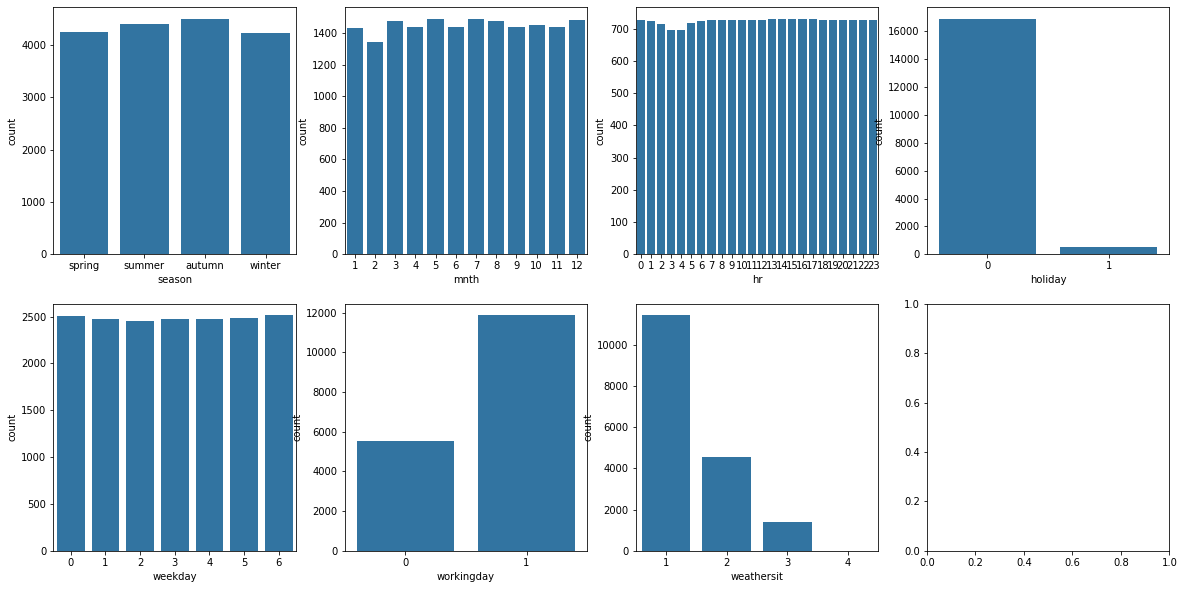

In [53]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(data_categorical, ax.flatten()):
  sns.countplot(x=variable, data=data_categorical, ax=subplot)

plt.show()

In [55]:
print(data_categorical.head(50))

    season  mnth  hr  holiday  weekday  workingday  weathersit
0   spring     1   0        0        6           0           1
1   spring     1   1        0        6           0           1
2   spring     1   2        0        6           0           1
3   spring     1   3        0        6           0           1
4   spring     1   4        0        6           0           1
5   spring     1   5        0        6           0           2
6   spring     1   6        0        6           0           1
7   spring     1   7        0        6           0           1
8   spring     1   8        0        6           0           1
9   spring     1   9        0        6           0           1
10  spring     1  10        0        6           0           1
11  spring     1  11        0        6           0           1
12  spring     1  12        0        6           0           1
13  spring     1  13        0        6           0           2
14  spring     1  14        0        6           0     

**Висновки з 5-7 завдання (детальні)**



1. Половина колонок в датасеті - категоріальні. 
2. Немає прямого звʼязку між кількістю аварій та порою року.
3. Немає сильного звяʼзку між кількістю аварій та місяцем.
4. Помітно що від 3 до 4 години найменше аварій, ймовірно звʼязано з меншою кількістю транспорту на дорозі.
5. Немає звяʼзку між кількістю аварій та днем тижня.
6. Більше аварій в робочий день, але робочих днів загалом більше тому це не вказує ні на що.
7. Чим гірша погода тим менша кількість аварій, але це також не вказує ні на що адже днів з хорошою погодою більше.



#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [67]:
columns_to_add = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
data_numerical = dataset[columns_to_add].copy()

**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

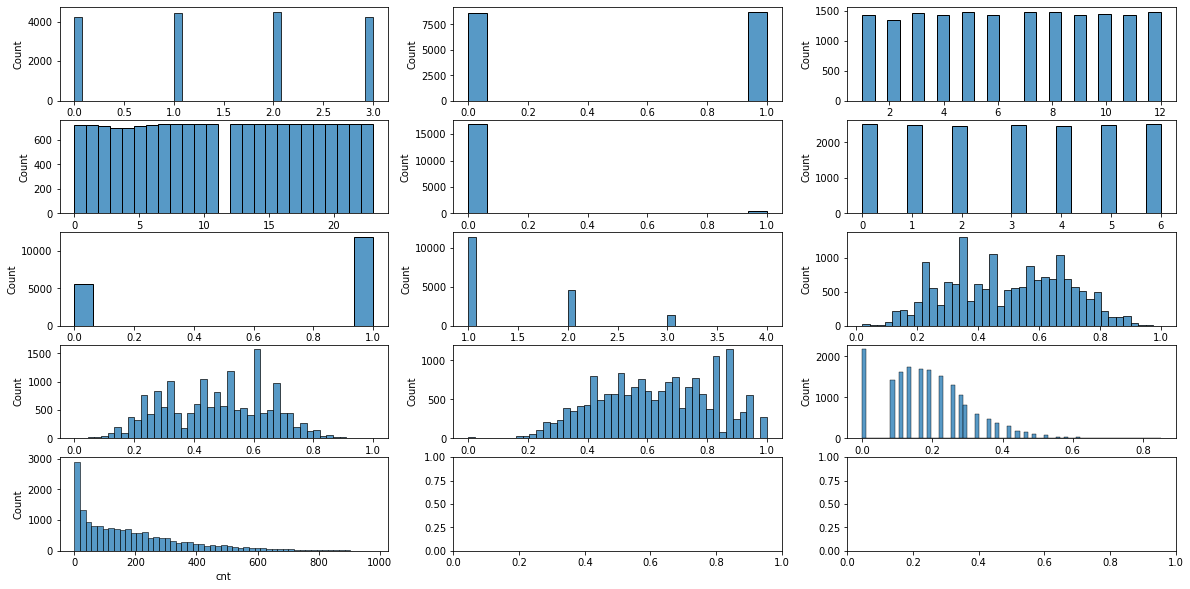

In [77]:
fig, ax = plt.subplots(5, 3, figsize=(20, 10))
for variable, subplot in zip(data_numerical, ax.flatten()):
  sns.histplot(x=variable, data=data_numerical, ax=subplot)

plt.show()

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

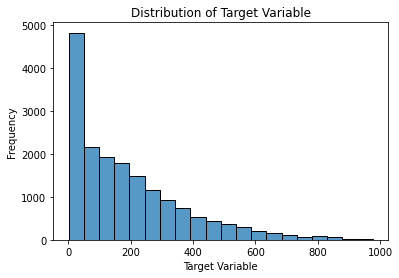

Coeficients: [-283.34214079   20.96417116    6.48958323  363.97583319]
Intercept: 173.05739711709512


In [79]:
sns.histplot(data=dataset, x='cnt', bins=20)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.show()

X = dataset[['hum', 'windspeed', "weathersit", "temp"]]
y = dataset['cnt']
model = LinearRegression()
model.fit(X, y)
slope_coefficients = model.coef_
intercept = model.intercept_

print(f"Coeficients: {slope_coefficients}\nIntercept: {intercept}")

**Висновки з 8-10 завдання (детальні)**



1.   
2.   
3. ...



#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
for var, subplot in zip(data_numerical.drop('cnt', axis =1), ax.flatten()):
  #your code

**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for var, subplot in zip(data_categorical, ax.flatten()):
  #your code

**Висновки з 11-12 завдання (детальні)**



1.   
2.   
3. ...



**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

In [ ]:
#your code

In [ ]:
#your conclusions 

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [ ]:
def get_dummies(df: pd.DataFrame):
  features = pd.concat([df,
                      # example:
                      pd.get_dummies(df['season']),
                      #YOUR CODE
                      ], axis = 1
                     )
  features = features.drop(['season',
                            'mnth', 
                            'weekday', 
                            'weathersit'
                            ], axis = 1)
  return fetures

In [ ]:
features = get_dummies(data)

2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [ ]:
features['night_hours'] = #your code
features = features.drop('hr', axis = 1)

**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [ ]:
features_lr = features.drop(['spring', 'mnth_4', 'weekday_0', 'weathersit_1', 'hr_0','atemp', 'date'], axis = 1)

In [ ]:
def get_train_data(df: pd.DataFrame, target:str, test_size:float):
  X = #your code (all features)
  y = #your code (target variable)
  X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=42, shuffle = True)
  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

In [ ]:
def train_linear_model(X_train, y_train):
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = train_linear_model(X_train, y_train)

In [ ]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

In [ ]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()

**Висновки з завдання (детальні)**



1.   
2.   
3. ...

